In [2]:
import pandas as pd

In [30]:
purprd = pd.read_csv('지역_시간/dataframe/purprd.csv')
purprd.head()

,channel,receipt_no,code_dae,code_jung,code_so,cust_no,branch_no,pur_date,pur_hour,pur_amount,...,cat_jung,cat_so,year,month,yoil,half,week,pur_time,period,pur_week_time
0,B,8664000,15,1504,B150401,17218,44,2014-02-22,20,2420,...,탄산음료,사이다,2014,2,토,1,주말,밤,2014_1,주말_밤
1,B,8664007,15,1504,B150401,11303,44,2014-02-22,13,2400,...,탄산음료,사이다,2014,2,토,1,주말,오후,2014_1,주말_오후
2,B,8919520,15,1504,B150401,13210,48,2015-09-21,19,5250,...,탄산음료,사이다,2015,9,월,2,주중,밤,2015_2,주중_밤
3,B,6956422,15,1504,B150401,13823,12,2014-08-13,18,2250,...,탄산음료,사이다,2014,8,수,2,주중,오후,2014_2,주중_오후
4,B,6957156,15,1504,B150401,18970,12,2014-08-31,22,4900,...,탄산음료,사이다,2014,8,일,2,주말,밤,2014_2,주말_밤


In [31]:
pr1 = purprd.query('period=="2014_1"')
pr2 = purprd.query('period=="2014_2"')

In [32]:
pr1

,channel,receipt_no,code_dae,code_jung,code_so,cust_no,branch_no,pur_date,pur_hour,pur_amount,...,cat_jung,cat_so,year,month,yoil,half,week,pur_time,period,pur_week_time
0,B,8664000,15,1504,B150401,17218,44,2014-02-22,20,2420,...,탄산음료,사이다,2014,2,토,1,주말,밤,2014_1,주말_밤
1,B,8664007,15,1504,B150401,11303,44,2014-02-22,13,2400,...,탄산음료,사이다,2014,2,토,1,주말,오후,2014_1,주말_오후
21,B,9427551,15,1504,B150401,14795,71,2014-04-08,20,6400,...,탄산음료,사이다,2014,4,화,1,주중,밤,2014_1,주중_밤
26,B,8198575,15,1504,B150401,1310,32,2014-01-25,21,4050,...,탄산음료,사이다,2014,1,토,1,주말,밤,2014_1,주말_밤
27,B,8345963,15,1504,B150401,10050,34,2014-06-21,22,2650,...,탄산음료,사이다,2014,6,토,1,주말,밤,2014_1,주말_밤
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28593004,B,2059,11,1105,B110506,6798,1,2014-01-28,14,24590,...,조미선물세트,기타세트,2014,1,화,1,주중,오후,2014_1,주중_오후
28593017,B,70929,45,4518,B451803,3229,3,2014-05-10,18,35000,...,썬글라스,온라인 썬글라스,2014,5,토,1,주말,오후,2014_1,주말_오후
28593023,B,9922930,5,506,B050607,9039,90,2014-01-02,20,11800,...,약초,둥글레,2014,1,목,1,주중,밤,2014_1,주중_밤
28593024,B,10496610,39,3901,B390103,11219,113,2014-03-03,15,860000,...,냉장고,기능성냉장고,2014,3,월,1,주중,오후,2014_1,주중_오후


In [177]:
mem = pd.read_csv('dataset/멤버십여부.txt',encoding='CP949')

In [77]:
pd.options.display.float_format = '{:f}'.format

mem.groupby('멤버십명')['고객번호'].agg(['count','nunique'])

,count,nunique
멤버십명,,
다둥이,2009,2009
더영,642,642
롭스,387,387
하이마트,4418,4418


In [ ]:
### 멤버십 여부


In [178]:
mem.가입년월 = mem.가입년월.apply(lambda x: str(x)+'01')

In [220]:
# def memb(x,d):
    
xx = mem.pivot_table(index='고객번호',columns='멤버십명',values='가입년월',aggfunc='sum')
xx

멤버십명,다둥이,더영,롭스,하이마트
고객번호,,,,
11,NaN,NaN,NaN,20151201
21,NaN,NaN,NaN,20150601
37,NaN,NaN,NaN,20130601
43,NaN,NaN,NaN,20140301
44,NaN,NaN,NaN,20141101
...,...,...,...,...
19377,NaN,NaN,20141101,NaN
19379,NaN,NaN,20141201,NaN
19380,NaN,NaN,20141201,NaN


In [221]:

for i in xx.columns:
    xx[i] = pd.to_datetime(xx[i])
    
xx

멤버십명,다둥이,더영,롭스,하이마트
고객번호,,,,
11,NaT,NaT,NaT,2015-12-01
21,NaT,NaT,NaT,2015-06-01
37,NaT,NaT,NaT,2013-06-01
43,NaT,NaT,NaT,2014-03-01
44,NaT,NaT,NaT,2014-11-01
...,...,...,...,...
19377,NaT,NaT,2014-11-01,NaT
19379,NaT,NaT,2014-12-01,NaT
19380,NaT,NaT,2014-12-01,NaT


In [222]:
from datetime import datetime
import numpy as np
dt = datetime(2015,1,1)

for i in xx.columns:
    xx[i] = xx[i].apply(lambda x : relativedelta(dt,x).months if type(x) != pd._libs.tslibs.nattype.NaTType else np.nan)

    
xx

멤버십명,다둥이,더영,롭스,하이마트
고객번호,,,,
11,NaN,NaN,NaN,-11.0
21,NaN,NaN,NaN,-5.0
37,NaN,NaN,NaN,7.0
43,NaN,NaN,NaN,10.0
44,NaN,NaN,NaN,2.0
...,...,...,...,...
19377,NaN,NaN,2.0,NaN
19379,NaN,NaN,1.0,NaN
19380,NaN,NaN,1.0,NaN


In [183]:
from dateutil.relativedelta import relativedelta
start = xx.loc[11,'하이마트']

delta = relativedelta(dt,start)
delta.months

-11

In [149]:
t

Timedelta('-518 days +00:00:00')

In [124]:
type(xx.loc[11,'다둥이'])

pandas._libs.tslibs.nattype.NaTType

In [223]:
import numpy as np
xx['mem_2'] = xx.apply(lambda x : (x[x>0]).min() if x.any()>0 else np.nan, axis=1)
xx

멤버십명,다둥이,더영,롭스,하이마트,mem_2
고객번호,,,,,
11,NaN,NaN,NaN,-11.0,NaN
21,NaN,NaN,NaN,-5.0,NaN
37,NaN,NaN,NaN,7.0,7.0
43,NaN,NaN,NaN,10.0,10.0
44,NaN,NaN,NaN,2.0,2.0
...,...,...,...,...,...
19377,NaN,NaN,2.0,NaN,2.0
19379,NaN,NaN,1.0,NaN,1.0
19380,NaN,NaN,1.0,NaN,1.0


In [218]:
xx['mem_1'].unique()

array([nan,  1.,  4.,  7.,  3.,  8.,  9.,  5., 11., 10.,  2.,  6.])

In [224]:
xx = xx.reset_index()
mem_2 = xx[['고객번호','mem_2']] 
mem_2.columns=['cust_no','mem_2']
mem_2

,cust_no,mem_2
0,11,NaN
1,21,NaN
2,37,7.0
3,43,10.0
4,44,2.0
...,...,...
6493,19377,2.0
6494,19379,1.0
6495,19380,1.0
6496,19381,NaN


In [164]:
mem_1

,cust_no,mem_1
0,11,NaN
1,21,NaN
2,37,1.000000
3,43,4.000000
4,44,NaN
...,...,...
6493,19377,NaN
6494,19379,NaN
6495,19380,NaN
6496,19381,NaN


In [44]:
asb = pd.read_csv('dataframe/total_var.csv')
asb

,pca_1_1_amount_amount,pca_2_1_amount_amount,pca_3_1_amount_amount,pca_1_2_amount_amount,pca_2_2_amount_amount,pca_3_2_amount_amount,cust_no,total_level_weight,total_freq_A_weight,total_freq_B_weight,...,item_일상용품_weight,item_교육/문화용품_weight,item_외식_weight,item_패션잡화_weight,item_의류_weight,item_기타_weight,item_전문스포츠/레저_weight,item_가구/인테리어_weight,item_가전_weight,item_명품_weight
0,0.784637,-0.213796,-0.598405,2.832500,-1.067632,-0.695149,1,8.5,1.647971,0.314864,...,8.5,0.0,7.0,-5.2,8.0,0.0,-4.0,7.5,4.5,0.0
1,1.803583,0.603966,0.055219,1.639555,0.564882,0.122170,2,-6.4,-2.184006,0.007569,...,-9.0,0.0,-4.2,-5.2,7.0,0.0,-8.5,-5.5,-7.5,1.5
2,-0.802985,0.063796,-0.028565,-0.779433,0.160906,-0.133339,3,0.2,-0.097707,-0.036331,...,0.6,0.0,0.0,0.0,-0.6,0.0,0.0,0.0,0.8,0.0
3,-0.105395,-0.065355,-0.184207,-0.223663,0.007239,-0.039796,4,-3.0,-1.758231,0.446562,...,4.5,0.0,-4.4,-4.0,-4.8,0.0,3.6,2.8,0.0,0.0
4,0.159417,-0.197516,-0.020612,-0.419092,-0.149246,0.125819,5,-3.6,-1.971118,-0.124129,...,-5.5,0.0,-6.5,-1.8,-2.4,0.0,0.7,2.4,-1.5,-0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,-0.811544,0.060712,-0.032733,-0.802842,0.139387,-0.141343,19376,0.1,-0.055130,0.446562,...,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19334,-0.811544,0.060712,-0.032733,-0.761870,0.149047,-0.119386,19377,0.1,0.030025,-0.036331,...,0.9,0.0,0.2,0.0,0.1,0.0,0.0,0.0,0.0,0.0
19335,-0.811544,0.060712,-0.032733,-0.753904,0.161616,-0.124824,19378,0.2,0.200335,-0.036331,...,0.9,0.0,0.2,0.0,0.6,0.0,0.0,0.0,0.0,0.0
19336,-0.811544,0.060712,-0.032733,-0.623547,0.284882,-0.071345,19379,0.3,0.115180,-0.080230,...,2.5,0.0,0.6,2.4,0.0,0.0,0.0,0.0,0.0,0.0


In [437]:
item = pd.read_csv('dataframe/item_di_ch.csv',index_col=0)
item

,item_가공식품_ch,item_의약품_ch,item_신선식품_ch,item_일상용품_ch,item_교육/문화용품_ch,item_외식_ch,item_패션잡화_ch,item_의류_ch,item_기타_ch,item_전문스포츠/레저_ch,item_가구/인테리어_ch,item_가전_ch,item_명품_ch
0,-3,3,1,1,0,2,-1,0,0,-8,3,9,0
1,-1,0,-1,0,0,0,-1,0,0,-1,-3,-1,5
2,0,0,1,1,0,0,0,-3,0,0,0,4,0
3,-2,-2,-2,3,0,-1,-2,0,0,0,5,0,0
4,-3,0,-3,-3,0,-1,-1,-2,0,1,6,-5,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,1,0,2,1,0,0,0,0,0,0,0,0,0
19334,1,0,0,3,0,2,0,1,0,0,0,0,0
19335,1,0,2,3,0,2,0,3,0,0,0,0,0
19336,1,3,0,5,0,3,6,0,0,0,0,0,0


In [255]:
abb = pd.read_csv('지역_시간/dataframe/item_pca.csv',index_col=0)
abb

,pca_1_1,pca_2_1,pca_3_1,pca_1_2,pca_2_2,pca_3_2
0,0.784637,-0.213796,-0.598405,2.832500,-1.067632,-0.695149
1,1.803583,0.603966,0.055219,1.639555,0.564882,0.122170
2,-0.802985,0.063796,-0.028565,-0.779433,0.160906,-0.133339
3,-0.105395,-0.065355,-0.184207,-0.223663,0.007239,-0.039796
4,0.159417,-0.197516,-0.020612,-0.419092,-0.149246,0.125819
...,...,...,...,...,...,...
19333,-0.811544,0.060712,-0.032733,-0.802842,0.139387,-0.141343
19334,-0.811544,0.060712,-0.032733,-0.761870,0.149047,-0.119386
19335,-0.811544,0.060712,-0.032733,-0.753904,0.161616,-0.124824
19336,-0.811544,0.060712,-0.032733,-0.623547,0.284882,-0.071345


In [38]:
import pandas as pd
asb = pd.read_csv('dataframe/변수_1009.csv')
asb

,cust_no,total_level_weight,total_freq_A_weight,total_freq_B_weight,total_freq_C_weight,amount_A_cut,amount_B_cut,amount_C_cut,pca_1_1,pca_2_1,...,pur_amount_quarter_A_weight_1,pur_amount_quarter_B_weight_1,pur_amount_quarter_C_weight_1,pur_amount_quarter_A_weight_2,pur_amount_quarter_B_weight_2,pur_amount_quarter_C_weight_2,total_freq_1_weight,total_freq_2_weight,pur_amount_period_weight_1,pur_amount_period_weight_2
0,1,8.5,1.647971,0.314864,0.920712,1.514700,0.852540,1.367811,2.501510,-3.505358,...,6.0,-0.2,2.0,6.8,-0.5,3.6,-0.4,3.5,6.4,7.5
1,2,-6.4,-2.184006,0.007569,-0.038065,-1.361034,0.206128,-0.051048,5.479009,-1.159008,...,-7.5,-0.2,0.0,-7.5,-0.2,0.0,-2.1,-0.5,-8.0,-8.5
2,3,0.2,-0.097707,-0.036331,1.495978,-0.402456,0.206128,1.367811,-2.324284,-3.566178,...,0.3,0.0,4.4,0.0,0.0,4.4,2.8,-3.5,0.4,-0.8
3,4,-3.0,-1.758231,0.446562,-1.188597,-1.041508,0.852540,-1.469908,0.516737,-1.915380,...,4.4,0.6,4.5,4.0,1.6,4.5,2.5,0.2,4.0,-3.0
4,5,-3.6,-1.971118,-0.124129,-0.038065,-1.361034,-0.440284,-0.051048,4.853939,-0.623359,...,-3.3,-0.1,0.0,-2.7,-0.0,0.0,0.8,-1.5,-4.8,-4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,19376,0.1,-0.055130,0.446562,-0.038065,-0.082930,0.852540,-0.051048,-1.442381,-0.664345,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0
19334,19377,0.1,0.030025,-0.036331,-0.038065,0.236596,0.206128,-0.051048,-1.442381,-0.664345,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0
19335,19378,0.2,0.200335,-0.036331,-0.038065,0.556122,0.206128,-0.051048,-1.442381,-0.664345,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0
19336,19379,0.3,0.115180,-0.080230,-0.038065,0.556122,-0.117078,-0.051048,-1.442381,-0.664345,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [225]:
asb.drop(['mem_1','mem_2'],axis=1,inplace=True)

asb = pd.merge(asb,mem_1,on='cust_no',how='left')
asb = pd.merge(asb,mem_2,on='cust_no',how='left')
asb

,pca_1_1_amount_amount,pca_2_1_amount_amount,pca_3_1_amount_amount,pca_1_2_amount_amount,pca_2_2_amount_amount,pca_3_2_amount_amount,cust_no,total_level_weight,total_freq_A_weight,total_freq_B_weight,total_freq_C_weight,amount_A_cut,amount_B_cut,amount_C_cut,pca_1_1,pca_2_1,pca_3_1,pca_1_2,pca_2_2,pca_3_2,label,total_freq_A_1_weight,total_freq_B_1_weight,total_freq_C_1_weight,total_freq_A_2_weight,total_freq_B_2_weight,total_freq_C_2_weight,pur_amount_quarter_A_weight_1,pur_amount_quarter_B_weight_1,pur_amount_quarter_C_weight_1,pur_amount_quarter_A_weight_2,pur_amount_quarter_B_weight_2,pur_amount_quarter_C_weight_2,total_freq_1_weight,total_freq_2_weight,pur_amount_period_weight_1,pur_amount_period_weight_2,item_가공식품_weight,item_의약품_weight,item_신선식품_weight,item_일상용품_weight,item_교육/문화용품_weight,item_외식_weight,item_패션잡화_weight,item_의류_weight,item_기타_weight,item_전문스포츠/레저_weight,item_가구/인테리어_weight,item_가전_weight,item_명품_weight,pca_A,pca_B,pca_C,online_1,online_2,mem_1,mem_2
0,0.784637,-0.213796,-0.598405,2.832500,-1.067632,-0.695149,1,8.5,1.647971,0.314864,0.920712,1.514700,0.852540,1.367811,2.501510,-3.505358,2.510093,2.699335,2.869114,3.295428,1,-4.0,-0.1,0.4,4.0,1.2,2.0,6.0,-0.2,2.0,6.8,-0.5,3.6,-0.4,3.5,6.4,7.5,-7.5,0.6,5.2,8.5,0.0,7.0,-5.2,8.0,0.0,-4.0,7.5,4.5,0.0,1.148306e+07,-719980.817963,-364611.502961,0.0,0.0,NaN,NaN
1,1.803583,0.603966,0.055219,1.639555,0.564882,0.122170,2,-6.4,-2.184006,0.007569,-0.038065,-1.361034,0.206128,-0.051048,5.479009,-1.159008,0.280189,4.824459,1.908645,0.165109,0,-5.0,-0.1,0.0,-4.0,0.2,0.0,-7.5,-0.2,0.0,-7.5,-0.2,0.0,-2.1,-0.5,-8.0,-8.5,-6.5,0.0,-8.5,-9.0,0.0,-4.2,-5.2,7.0,0.0,-8.5,-5.5,-7.5,1.5,4.387892e+06,-763401.488906,-463185.698405,0.0,0.0,NaN,NaN
2,-0.802985,0.063796,-0.028565,-0.779433,0.160906,-0.133339,3,0.2,-0.097707,-0.036331,1.495978,-0.402456,0.206128,1.367811,-2.324284,-3.566178,-1.503844,-4.313222,2.154137,-1.154221,1,0.1,0.0,4.0,0.0,-0.1,-4.0,0.3,0.0,4.4,0.0,0.0,4.4,2.8,-3.5,0.4,-0.8,0.8,0.0,1.0,0.6,0.0,0.0,0.0,-0.6,0.0,0.0,0.0,0.8,0.0,-3.559285e+06,-762740.988125,445884.044483,0.0,0.0,NaN,NaN
3,-0.105395,-0.065355,-0.184207,-0.223663,0.007239,-0.039796,4,-3.0,-1.758231,0.446562,-1.188597,-1.041508,0.852540,-1.469908,0.516737,-1.915380,1.801946,-0.404022,1.142879,1.496629,1,4.5,0.6,2.0,-2.4,0.0,1.2,4.4,0.6,4.5,4.0,1.6,4.5,2.5,0.2,4.0,-3.0,-3.2,-2.4,-4.0,4.5,0.0,-4.4,-4.0,-4.8,0.0,3.6,2.8,0.0,0.0,-1.413001e+06,-697103.040917,-399711.367023,0.0,0.0,NaN,NaN
4,0.159417,-0.197516,-0.020612,-0.419092,-0.149246,0.125819,5,-3.6,-1.971118,-0.124129,-0.038065,-1.361034,-0.440284,-0.051048,4.853939,-0.623359,-1.040776,2.465400,1.812457,-4.062787,1,3.0,-0.1,0.0,-4.0,0.0,0.0,-3.3,-0.1,0.0,-2.7,-0.0,0.0,0.8,-1.5,-4.8,-4.0,-6.5,0.0,-4.5,-5.5,0.0,-6.5,-1.8,-2.4,0.0,0.7,2.4,-1.5,-0.2,-3.133871e+06,-763529.040321,-463185.698405,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,-0.811544,0.060712,-0.032733,-0.802842,0.139387,-0.141343,19376,0.1,-0.055130,0.446562,-0.038065,-0.082930,0.852540,-0.051048,-1.442381,-0.664345,-6.482210,-1.147307,-1.970471,-4.115034,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.2,0.0,0.4,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.589678e+06,-700498.273090,-463185.698405,0.0,0.0,NaN,NaN
19334,-0.811544,0.060712,-0.032733,-0.761870,0.149047,-0.119386,19377,0.1,0.030025,-0.036331,-0.038065,0.236596,0.206128,-0.051048,-1.442381,-0.664345,-6.482210,0.049985,-0.465224,-3.429639,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.1,0.0,0.0,0.9,0.0,0.2,0.0,0.1,0.0,0.0,0.0,0.0,0.0,-3.575046e+06,-761076.035342,-463185.698405,0.0,0.0,NaN,2.0
19335,-0.811544,0.060712,-0.032733,-0.753904,0.161616,-0.124824,19378,0.2,0.200335,-0.036331,-0.038065,0.556122,0.206128,-0.051048,-1.442381,-0.664345,-6.482210,1.313979,0.207517,-2.202948,0,0.0,0.0,0

In [41]:
ad = pd.read_csv('지역_시간/dataframe/item_di_weight.csv',index_col=0)
ad

,cust_no,item_가공식품_weight,item_의약품_weight,item_신선식품_weight,item_일상용품_weight,item_교육/문화용품_weight,item_외식_weight,item_패션잡화_weight,item_의류_weight,item_기타_weight,item_전문스포츠/레저_weight,item_가구/인테리어_weight,item_가전_weight,item_명품_weight
0,1,-7.5,0.6,5.2,8.5,0.0,7.0,-5.2,8.0,0.0,-4.0,7.5,4.5,0.0
1,2,-6.5,0.0,-8.5,-9.0,0.0,-4.2,-5.2,7.0,0.0,-8.5,-5.5,-7.5,1.5
2,3,0.8,0.0,1.0,0.6,0.0,0.0,0.0,-0.6,0.0,0.0,0.0,0.8,0.0
3,4,-3.2,-2.4,-4.0,4.5,0.0,-4.4,-4.0,-4.8,0.0,3.6,2.8,0.0,0.0
4,5,-6.5,0.0,-4.5,-5.5,0.0,-6.5,-1.8,-2.4,0.0,0.7,2.4,-1.5,-0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,19376,0.2,0.0,0.4,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19334,19377,0.1,0.0,0.0,0.9,0.0,0.2,0.0,0.1,0.0,0.0,0.0,0.0,0.0
19335,19378,0.1,0.0,0.4,0.9,0.0,0.2,0.0,0.6,0.0,0.0,0.0,0.0,0.0
19336,19379,0.2,0.6,0.0,2.5,0.0,0.6,2.4,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
asb = pd.merge(asb,ad,on='cust_no',how='left')
asb

,cust_no,total_level_weight,total_freq_A_weight,total_freq_B_weight,total_freq_C_weight,amount_A_cut,amount_B_cut,amount_C_cut,pca_1_1,pca_2_1,...,item_일상용품_weight,item_교육/문화용품_weight,item_외식_weight,item_패션잡화_weight,item_의류_weight,item_기타_weight,item_전문스포츠/레저_weight,item_가구/인테리어_weight,item_가전_weight,item_명품_weight
0,1,8.5,1.647971,0.314864,0.920712,1.514700,0.852540,1.367811,2.501510,-3.505358,...,8.5,0.0,7.0,-5.2,8.0,0.0,-4.0,7.5,4.5,0.0
1,2,-6.4,-2.184006,0.007569,-0.038065,-1.361034,0.206128,-0.051048,5.479009,-1.159008,...,-9.0,0.0,-4.2,-5.2,7.0,0.0,-8.5,-5.5,-7.5,1.5
2,3,0.2,-0.097707,-0.036331,1.495978,-0.402456,0.206128,1.367811,-2.324284,-3.566178,...,0.6,0.0,0.0,0.0,-0.6,0.0,0.0,0.0,0.8,0.0
3,4,-3.0,-1.758231,0.446562,-1.188597,-1.041508,0.852540,-1.469908,0.516737,-1.915380,...,4.5,0.0,-4.4,-4.0,-4.8,0.0,3.6,2.8,0.0,0.0
4,5,-3.6,-1.971118,-0.124129,-0.038065,-1.361034,-0.440284,-0.051048,4.853939,-0.623359,...,-5.5,0.0,-6.5,-1.8,-2.4,0.0,0.7,2.4,-1.5,-0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,19376,0.1,-0.055130,0.446562,-0.038065,-0.082930,0.852540,-0.051048,-1.442381,-0.664345,...,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19334,19377,0.1,0.030025,-0.036331,-0.038065,0.236596,0.206128,-0.051048,-1.442381,-0.664345,...,0.9,0.0,0.2,0.0,0.1,0.0,0.0,0.0,0.0,0.0
19335,19378,0.2,0.200335,-0.036331,-0.038065,0.556122,0.206128,-0.051048,-1.442381,-0.664345,...,0.9,0.0,0.2,0.0,0.6,0.0,0.0,0.0,0.0,0.0
19336,19379,0.3,0.115180,-0.080230,-0.038065,0.556122,-0.117078,-0.051048,-1.442381,-0.664345,...,2.5,0.0,0.6,2.4,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
abb.columns = list(map(lambda x: x+'_amount',abb.columns))
asb=pd.concat([abb,asb],axis=1)


NameError: name 'abb' is not defined

In [265]:
asb

,pca_1_1_amount_amount,pca_2_1_amount_amount,pca_3_1_amount_amount,pca_1_2_amount_amount,pca_2_2_amount_amount,pca_3_2_amount_amount,cust_no,total_level_weight,total_freq_A_weight,total_freq_B_weight,...,item_일상용품_weight,item_교육/문화용품_weight,item_외식_weight,item_패션잡화_weight,item_의류_weight,item_기타_weight,item_전문스포츠/레저_weight,item_가구/인테리어_weight,item_가전_weight,item_명품_weight
0,0.784637,-0.213796,-0.598405,2.832500,-1.067632,-0.695149,1,8.500000,1.647971,0.314864,...,8.500000,0.000000,7.000000,-5.200000,8.000000,0.000000,-4.000000,7.500000,4.500000,0.000000
1,1.803583,0.603966,0.055219,1.639555,0.564882,0.122170,2,-6.400000,-2.184006,0.007569,...,-9.000000,0.000000,-4.200000,-5.200000,7.000000,0.000000,-8.500000,-5.500000,-7.500000,1.500000
2,-0.802985,0.063796,-0.028565,-0.779433,0.160906,-0.133339,3,0.200000,-0.097707,-0.036331,...,0.600000,0.000000,0.000000,0.000000,-0.600000,0.000000,0.000000,0.000000,0.800000,0.000000
3,-0.105395,-0.065355,-0.184207,-0.223663,0.007239,-0.039796,4,-3.000000,-1.758231,0.446562,...,4.500000,0.000000,-4.400000,-4.000000,-4.800000,0.000000,3.600000,2.800000,0.000000,0.000000
4,0.159417,-0.197516,-0.020612,-0.419092,-0.149246,0.125819,5,-3.600000,-1.971118,-0.124129,...,-5.500000,0.000000,-6.500000,-1.800000,-2.400000,0.000000,0.700000,2.400000,-1.500000,-0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,-0.811544,0.060712,-0.032733,-0.802842,0.139387,-0.141343,19376,0.100000,-0.055130,0.446562,...,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
19334,-0.811544,0.060712,-0.032733,-0.761870,0.149047,-0.119386,19377,0.100000,0.030025,-0.036331,...,0.900000,0.000000,0.200000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000
19335,-0.811544,0.060712,-0.032733,-0.753904,0.161616,-0.124824,19378,0.200000,0.200335,-0.036331,...,0.900000,0.000000,0.200000,0.000000,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000
19336,-0.811544,0.060712,-0.032733,-0.623547,0.284882,-0.071345,19379,0.300000,0.115180,-0.080230,...,2.500000,0.000000,0.600000,2.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [201]:
def cat(x):
    if x ==0:
        return 0
    else:
        (x-1)//6 +1
        
for i in [1,2]:
    asb[f'mem_{i}'] = asb[f'mem_{i}'].apply(cat)

In [316]:
cust = pd.read_csv('지역_시간/dataframe/cust_demo_plus.csv')
cust.head()

,cust_no,region_code,region,region_plus,gender,age_cat,online_B,online_C,mobile_A,mobile_B,mobile_C,mobile_D,하이마트,다둥이,롭스,더영
0,1,60.0,서울특별시,동남권,0,5,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
1,2,100.0,경기도,경기도,0,5,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
2,3,33.0,서울특별시,서북권,0,5,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
3,4,16.0,서울특별시,동북권,1,5,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
4,5,100.0,경기도,경기도,0,5,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0


In [338]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
cust['region_plus'] = encoder.fit_transform(cust['region_plus'])

asb1 = pd.merge(asb,cust[['cust_no','gender','region_plus']],on='cust_no',how='left')
asb1.head()

,pca_1_1_amount_amount,pca_2_1_amount_amount,pca_3_1_amount_amount,pca_1_2_amount_amount,pca_2_2_amount_amount,pca_3_2_amount_amount,cust_no,total_level_weight,total_freq_A_weight,total_freq_B_weight,total_freq_C_weight,amount_A_cut,amount_B_cut,amount_C_cut,pca_1_1,pca_2_1,pca_3_1,pca_1_2,pca_2_2,pca_3_2,label,total_freq_A_1_weight,total_freq_B_1_weight,total_freq_C_1_weight,total_freq_A_2_weight,total_freq_B_2_weight,total_freq_C_2_weight,pur_amount_quarter_A_weight_1,pur_amount_quarter_B_weight_1,pur_amount_quarter_C_weight_1,pur_amount_quarter_A_weight_2,pur_amount_quarter_B_weight_2,pur_amount_quarter_C_weight_2,total_freq_1_weight,total_freq_2_weight,pur_amount_period_weight_1,pur_amount_period_weight_2,item_가공식품_weight,item_의약품_weight,item_신선식품_weight,item_일상용품_weight,item_교육/문화용품_weight,item_외식_weight,item_패션잡화_weight,item_의류_weight,item_기타_weight,item_전문스포츠/레저_weight,item_가구/인테리어_weight,item_가전_weight,item_명품_weight,pca_A,pca_B,pca_C,online_1,online_2,mem_1,mem_2,gender,region_plus
0,0.784637,-0.213796,-0.598405,2.832500,-1.067632,-0.695149,1,8.5,1.647971,0.314864,0.920712,1.514700,0.852540,1.367811,2.501510,-3.505358,2.510093,2.699335,2.869114,3.295428,1,-4.0,-0.1,0.4,4.0,1.2,2.0,6.0,-0.2,2.0,6.8,-0.5,3.6,-0.4,3.5,6.4,7.5,-7.5,0.6,5.2,8.5,0.0,7.0,-5.2,8.0,0.0,-4.0,7.5,4.5,0.0,1.148306e+07,-719980.817963,-364611.502961,0.0,0.0,0.0,0.0,0,8
1,1.803583,0.603966,0.055219,1.639555,0.564882,0.122170,2,-6.4,-2.184006,0.007569,-0.038065,-1.361034,0.206128,-0.051048,5.479009,-1.159008,0.280189,4.824459,1.908645,0.165109,0,-5.0,-0.1,0.0,-4.0,0.2,0.0,-7.5,-0.2,0.0,-7.5,-0.2,0.0,-2.1,-0.5,-8.0,-8.5,-6.5,0.0,-8.5,-9.0,0.0,-4.2,-5.2,7.0,0.0,-8.5,-5.5,-7.5,1.5,4.387892e+06,-763401.488906,-463185.698405,0.0,0.0,0.0,0.0,0,1
2,-0.802985,0.063796,-0.028565,-0.779433,0.160906,-0.133339,3,0.2,-0.097707,-0.036331,1.495978,-0.402456,0.206128,1.367811,-2.324284,-3.566178,-1.503844,-4.313222,2.154137,-1.154221,1,0.1,0.0,4.0,0.0,-0.1,-4.0,0.3,0.0,4.4,0.0,0.0,4.4,2.8,-3.5,0.4,-0.8,0.8,0.0,1.0,0.6,0.0,0.0,0.0,-0.6,0.0,0.0,0.0,0.8,0.0,-3.559285e+06,-762740.988125,445884.044483,0.0,0.0,0.0,0.0,0,12
3,-0.105395,-0.065355,-0.184207,-0.223663,0.007239,-0.039796,4,-3.0,-1.758231,0.446562,-1.188597,-1.041508,0.852540,-1.469908,0.516737,-1.915380,1.801946,-0.404022,1.142879,1.496629,1,4.5,0.6,2.0,-2.4,0.0,1.2,4.4,0.6,4.5,4.0,1.6,4.5,2.5,0.2,4.0,-3.0,-3.2,-2.4,-4.0,4.5,0.0,-4.4,-4.0,-4.8,0.0,3.6,2.8,0.0,0.0,-1.413001e+06,-697103.040917,-399711.367023,0.0,0.0,0.0,0.0,1,9
4,0.159417,-0.197516,-0.020612,-0.419092,-0.149246,0.125819,5,-3.6,-1.971118,-0.124129,-0.038065,-1.361034,-0.440284,-0.051048,4.853939,-0.623359,-1.040776,2.465400,1.812457,-4.062787,1,3.0,-0.1,0.0,-4.0,0.0,0.0,-3.3,-0.1,0.0,-2.7,-0.0,0.0,0.8,-1.5,-4.8,-4.0,-6.5,0.0,-4.5,-5.5,0.0,-6.5,-1.8,-2.4,0.0,0.7,2.4,-1.5,-0.2,-3.133871e+06,-763529.040321,-463185.698405,0.0,0.0,0.0,0.0,0,1


In [323]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score

In [291]:
asb.fillna(0,inplace=True)

In [353]:
asb2.to_csv('dataframe/1011_var_2.csv',index=False)

In [343]:
abb3 = pd.read_csv('dataframe/amount_quarter.csv',index_col=0)
asb2 = pd.concat([asb,abb3],axis=1)
asb2

,pca_1_1_amount_amount,pca_2_1_amount_amount,pca_3_1_amount_amount,pca_1_2_amount_amount,pca_2_2_amount_amount,pca_3_2_amount_amount,cust_no,total_level_weight,total_freq_A_weight,total_freq_B_weight,total_freq_C_weight,amount_A_cut,amount_B_cut,amount_C_cut,pca_1_1,pca_2_1,pca_3_1,pca_1_2,pca_2_2,pca_3_2,label,total_freq_A_1_weight,total_freq_B_1_weight,total_freq_C_1_weight,total_freq_A_2_weight,total_freq_B_2_weight,total_freq_C_2_weight,pur_amount_quarter_A_weight_1,pur_amount_quarter_B_weight_1,pur_amount_quarter_C_weight_1,pur_amount_quarter_A_weight_2,pur_amount_quarter_B_weight_2,pur_amount_quarter_C_weight_2,total_freq_1_weight,total_freq_2_weight,pur_amount_period_weight_1,pur_amount_period_weight_2,item_가공식품_weight,item_의약품_weight,item_신선식품_weight,item_일상용품_weight,item_교육/문화용품_weight,item_외식_weight,item_패션잡화_weight,item_의류_weight,item_기타_weight,item_전문스포츠/레저_weight,item_가구/인테리어_weight,item_가전_weight,item_명품_weight,pca_A,pca_B,pca_C,online_1,online_2,mem_1,mem_2,amount_1_weight,amount_2_weight
0,0.784637,-0.213796,-0.598405,2.832500,-1.067632,-0.695149,1,8.5,1.647971,0.314864,0.920712,1.514700,0.852540,1.367811,2.501510,-3.505358,2.510093,2.699335,2.869114,3.295428,1,-4.0,-0.1,0.4,4.0,1.2,2.0,6.0,-0.2,2.0,6.8,-0.5,3.6,-0.4,3.5,6.4,7.5,-7.5,0.6,5.2,8.5,0.0,7.0,-5.2,8.0,0.0,-4.0,7.5,4.5,0.0,1.148306e+07,-719980.817963,-364611.502961,0.0,0.0,0.0,0.0,6.4,8.5
1,1.803583,0.603966,0.055219,1.639555,0.564882,0.122170,2,-6.4,-2.184006,0.007569,-0.038065,-1.361034,0.206128,-0.051048,5.479009,-1.159008,0.280189,4.824459,1.908645,0.165109,0,-5.0,-0.1,0.0,-4.0,0.2,0.0,-7.5,-0.2,0.0,-7.5,-0.2,0.0,-2.1,-0.5,-8.0,-8.5,-6.5,0.0,-8.5,-9.0,0.0,-4.2,-5.2,7.0,0.0,-8.5,-5.5,-7.5,1.5,4.387892e+06,-763401.488906,-463185.698405,0.0,0.0,0.0,0.0,-8.0,-8.0
2,-0.802985,0.063796,-0.028565,-0.779433,0.160906,-0.133339,3,0.2,-0.097707,-0.036331,1.495978,-0.402456,0.206128,1.367811,-2.324284,-3.566178,-1.503844,-4.313222,2.154137,-1.154221,1,0.1,0.0,4.0,0.0,-0.1,-4.0,0.3,0.0,4.4,0.0,0.0,4.4,2.8,-3.5,0.4,-0.8,0.8,0.0,1.0,0.6,0.0,0.0,0.0,-0.6,0.0,0.0,0.0,0.8,0.0,-3.559285e+06,-762740.988125,445884.044483,0.0,0.0,0.0,0.0,0.6,-0.6
3,-0.105395,-0.065355,-0.184207,-0.223663,0.007239,-0.039796,4,-3.0,-1.758231,0.446562,-1.188597,-1.041508,0.852540,-1.469908,0.516737,-1.915380,1.801946,-0.404022,1.142879,1.496629,1,4.5,0.6,2.0,-2.4,0.0,1.2,4.4,0.6,4.5,4.0,1.6,4.5,2.5,0.2,4.0,-3.0,-3.2,-2.4,-4.0,4.5,0.0,-4.4,-4.0,-4.8,0.0,3.6,2.8,0.0,0.0,-1.413001e+06,-697103.040917,-399711.367023,0.0,0.0,0.0,0.0,5.0,-3.0
4,0.159417,-0.197516,-0.020612,-0.419092,-0.149246,0.125819,5,-3.6,-1.971118,-0.124129,-0.038065,-1.361034,-0.440284,-0.051048,4.853939,-0.623359,-1.040776,2.465400,1.812457,-4.062787,1,3.0,-0.1,0.0,-4.0,0.0,0.0,-3.3,-0.1,0.0,-2.7,-0.0,0.0,0.8,-1.5,-4.8,-4.0,-6.5,0.0,-4.5,-5.5,0.0,-6.5,-1.8,-2.4,0.0,0.7,2.4,-1.5,-0.2,-3.133871e+06,-763529.040321,-463185.698405,0.0,0.0,0.0,0.0,-4.4,-2.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,-0.811544,0.060712,-0.032733,-0.802842,0.139387,-0.141343,19376,0.1,-0.055130,0.446562,-0.038065,-0.082930,0.852540,-0.051048,-1.442381,-0.664345,-6.482210,-1.147307,-1.970471,-4.115034,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.2,0.0,0.4,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.589678e+06,-700498.273090,-463185.698405,0.0,0.0,0.0,0.0,0.0,0.9
19334,-0.811544,0.060712,-0.032733,-0.761870,0.149047,-0.119386,19377,0.1,0.030025,-0.036331,-0.038065,0.236596,0.206128,-0.051048,-1.442381,-0.664345,-6.482210,0.049985,-0.465224,-3.429639,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.1,0.0,0.0,0.9,0.0,0.2,0.0,0.1,0.0,0.0,0.0,0.0,0.0,-3.575046e+06,-761076.035342,-463185.698405,0.0,0.0,0.0,2.0,0.0,0.2
19335,-0.811544,0.060712,-0.032733,-0.753904,0.161616,-0.124824,19378,0.2,0.200335,-0.036331,-0.03

In [354]:
abb4 = pd.read_csv('dataframe/total_freq_weight.csv',index_col=0)
abb4

,freq_weight
0,7.0
1,-3.9
2,4.4
3,-3.2
4,-5.0
...,...
19333,0.3
19334,0.1
19335,0.2
19336,0.5


In [438]:
asb3 = pd.concat([asb,item],axis=1)
asb3

,pca_1_1_amount_amount,pca_2_1_amount_amount,pca_3_1_amount_amount,pca_1_2_amount_amount,pca_2_2_amount_amount,pca_3_2_amount_amount,cust_no,total_level_weight,total_freq_A_weight,total_freq_B_weight,total_freq_C_weight,amount_A_cut,amount_B_cut,amount_C_cut,pca_1_1,pca_2_1,pca_3_1,pca_1_2,pca_2_2,pca_3_2,label,total_freq_A_1_weight,total_freq_B_1_weight,total_freq_C_1_weight,total_freq_A_2_weight,total_freq_B_2_weight,total_freq_C_2_weight,pur_amount_quarter_A_weight_1,pur_amount_quarter_B_weight_1,pur_amount_quarter_C_weight_1,pur_amount_quarter_A_weight_2,pur_amount_quarter_B_weight_2,pur_amount_quarter_C_weight_2,total_freq_1_weight,total_freq_2_weight,pur_amount_period_weight_1,pur_amount_period_weight_2,item_가공식품_weight,item_의약품_weight,item_신선식품_weight,item_일상용품_weight,item_교육/문화용품_weight,item_외식_weight,item_패션잡화_weight,item_의류_weight,item_기타_weight,item_전문스포츠/레저_weight,item_가구/인테리어_weight,item_가전_weight,item_명품_weight,pca_A,pca_B,pca_C,online_1,online_2,mem_1,mem_2,item_가공식품_ch,item_의약품_ch,item_신선식품_ch,item_일상용품_ch,item_교육/문화용품_ch,item_외식_ch,item_패션잡화_ch,item_의류_ch,item_기타_ch,item_전문스포츠/레저_ch,item_가구/인테리어_ch,item_가전_ch,item_명품_ch
0,0.784637,-0.213796,-0.598405,2.832500,-1.067632,-0.695149,1,8.5,1.647971,0.314864,0.920712,1.514700,0.852540,1.367811,2.501510,-3.505358,2.510093,2.699335,2.869114,3.295428,1,-4.0,-0.1,0.4,4.0,1.2,2.0,6.0,-0.2,2.0,6.8,-0.5,3.6,-0.4,3.5,6.4,7.5,-7.5,0.6,5.2,8.5,0.0,7.0,-5.2,8.0,0.0,-4.0,7.5,4.5,0.0,1.148306e+07,-719980.817963,-364611.502961,0.0,0.0,0.0,0.0,-3,3,1,1,0,2,-1,0,0,-8,3,9,0
1,1.803583,0.603966,0.055219,1.639555,0.564882,0.122170,2,-6.4,-2.184006,0.007569,-0.038065,-1.361034,0.206128,-0.051048,5.479009,-1.159008,0.280189,4.824459,1.908645,0.165109,0,-5.0,-0.1,0.0,-4.0,0.2,0.0,-7.5,-0.2,0.0,-7.5,-0.2,0.0,-2.1,-0.5,-8.0,-8.5,-6.5,0.0,-8.5,-9.0,0.0,-4.2,-5.2,7.0,0.0,-8.5,-5.5,-7.5,1.5,4.387892e+06,-763401.488906,-463185.698405,0.0,0.0,0.0,0.0,-1,0,-1,0,0,0,-1,0,0,-1,-3,-1,5
2,-0.802985,0.063796,-0.028565,-0.779433,0.160906,-0.133339,3,0.2,-0.097707,-0.036331,1.495978,-0.402456,0.206128,1.367811,-2.324284,-3.566178,-1.503844,-4.313222,2.154137,-1.154221,1,0.1,0.0,4.0,0.0,-0.1,-4.0,0.3,0.0,4.4,0.0,0.0,4.4,2.8,-3.5,0.4,-0.8,0.8,0.0,1.0,0.6,0.0,0.0,0.0,-0.6,0.0,0.0,0.0,0.8,0.0,-3.559285e+06,-762740.988125,445884.044483,0.0,0.0,0.0,0.0,0,0,1,1,0,0,0,-3,0,0,0,4,0
3,-0.105395,-0.065355,-0.184207,-0.223663,0.007239,-0.039796,4,-3.0,-1.758231,0.446562,-1.188597,-1.041508,0.852540,-1.469908,0.516737,-1.915380,1.801946,-0.404022,1.142879,1.496629,1,4.5,0.6,2.0,-2.4,0.0,1.2,4.4,0.6,4.5,4.0,1.6,4.5,2.5,0.2,4.0,-3.0,-3.2,-2.4,-4.0,4.5,0.0,-4.4,-4.0,-4.8,0.0,3.6,2.8,0.0,0.0,-1.413001e+06,-697103.040917,-399711.367023,0.0,0.0,0.0,0.0,-2,-2,-2,3,0,-1,-2,0,0,0,5,0,0
4,0.159417,-0.197516,-0.020612,-0.419092,-0.149246,0.125819,5,-3.6,-1.971118,-0.124129,-0.038065,-1.361034,-0.440284,-0.051048,4.853939,-0.623359,-1.040776,2.465400,1.812457,-4.062787,1,3.0,-0.1,0.0,-4.0,0.0,0.0,-3.3,-0.1,0.0,-2.7,-0.0,0.0,0.8,-1.5,-4.8,-4.0,-6.5,0.0,-4.5,-5.5,0.0,-6.5,-1.8,-2.4,0.0,0.7,2.4,-1.5,-0.2,-3.133871e+06,-763529.040321,-463185.698405,0.0,0.0,0.0,0.0,-3,0,-3,-3,0,-1,-1,-2,0,1,6,-5,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,-0.811544,0.060712,-0.032733,-0.802842,0.139387,-0.141343,19376,0.1,-0.055130,0.446562,-0.038065,-0.082930,0.852540,-0.051048,-1.442381,-0.664345,-6.482210,-1.147307,-1.970471,-4.115034,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.2,0.0,0.4,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.589678e+06,-700498.273090,-463185.698405,0.0,0.0,0.0,0.0,1,0,2,1,0,0,0,0,0,0,0,0,0
19334,-0.811544,0.060712,-0.032733,-0.761870,0.149047,-0.119386,19377,0.1,0.030025,-0.036331,-0.038065,0.236596,0.206128,-0.051048,-1.442381,-0.664345,-6.482210,0.049985

In [393]:
asb3= pd.merge(asb3,cust[['cust_no','gender','age_cat']],on='cust_no',how='left')

In [435]:
asb4 = pd.read_csv('dataframe/1011_var_3.csv')

In [443]:
X = asb.drop(['label',
              'amount_A_cut','amount_B_cut','amount_C_cut',
              'pur_amount_quarter_A_weight_1','pur_amount_quarter_B_weight_1','pur_amount_quarter_C_weight_1',
              'pur_amount_quarter_A_weight_2','pur_amount_quarter_B_weight_2','pur_amount_quarter_C_weight_2',
              'pca_A', 'pca_B', 'pca_C',
               
'pca_1_1_amount_amount', 'pca_2_1_amount_amount',
'pca_3_1_amount_amount', 'pca_1_2_amount_amount',
'pca_2_2_amount_amount', 'pca_3_2_amount_amount',
 'online_2','online_1',
    
             ],axis=1).fillna(0)
y = asb['label']



X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.2,
                                                   random_state=7,
                                                   )

In [444]:
rf = RandomForestClassifier(n_estimators=500)
rf.fit(X_train,y_train)
preds=rf.predict(X_test)

acc = accuracy_score(y_test, preds)
print (acc*100)

75.0258531540848


In [445]:
X = asb.drop(['label',
              'amount_A_cut','amount_B_cut','amount_C_cut',
              'pur_amount_quarter_A_weight_1','pur_amount_quarter_B_weight_1','pur_amount_quarter_C_weight_1',
              'pur_amount_quarter_A_weight_2','pur_amount_quarter_B_weight_2','pur_amount_quarter_C_weight_2',
              'pca_A', 'pca_B', 'pca_C',
               
'pca_1_1_amount_amount', 'pca_2_1_amount_amount',
'pca_3_1_amount_amount', 'pca_1_2_amount_amount',
'pca_2_2_amount_amount', 'pca_3_2_amount_amount',

             ],axis=1).fillna(0)
y = asb['label']




X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.2,
                                                   random_state=7,
                                                   )

In [446]:
rf = RandomForestClassifier(n_estimators=500)
rf.fit(X_train,y_train)
preds=rf.predict(X_test)

acc = accuracy_score(y_test, preds)
print (acc*100)

75.0775594622544


In [273]:
X = asb1.drop(['label'
             ],axis=1).fillna(0)
y = asb1['label']
# 'pca_1_1','pca_2_1','pca_3_1','pca_1_2','pca_2_2','pca_3_2'
# X['channel_freq_A_ch'] = np.log1p(X['channel_freq_A_ch'])
# X['channel_freq_B_ch'] = np.log1p(X['channel_freq_B_ch'])
# X['channel_freq_C_ch'] = np.log1p(X['channel_freq_B_ch'])


X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.2,
                                                   random_state=7,
                                                   )

In [282]:
lg = LGBMClassifier(n_estimators = 500, learning_rate=0.1, n_jobs=-1)
lg.fit(X_train, y_train)
preds2= lg.predict(X_test)

print (accuracy_score(y_test, preds2))

0.7357807652533609


In [283]:
xg = XGBClassifier(n_estimators = 500, learning_rate=0.1, n_jobs=-1)
xg.fit(X_train, y_train)
preds1 = xg.predict(X_test)

print (accuracy_score(y_test, preds1))

[20:41:31] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.7401758014477766


In [285]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
preds=lr.predict(X_test)

acc = accuracy_score(y_test, preds)
print (acc)

0.5930713547052741


In [231]:
li = []
for i in zip(rf.feature_importances_, X.columns):
    li.append(i)
    
li.sort()
li

[(0.0028179281126543177, 'online_2'),
 (0.0036381381699818294, 'online_1'),
 (0.004441264823464954, 'mem_1'),
 (0.005685884277520645, 'mem_2'),
 (0.011118041632091331, 'item_기타_weight'),
 (0.011327320799868578, 'item_명품_weight'),
 (0.011609422495292763, 'total_freq_C_1_weight'),
 (0.012375452949959466, 'total_freq_C_2_weight'),
 (0.014514169534603822, 'total_freq_B_1_weight'),
 (0.015422834353374139, 'total_freq_B_2_weight'),
 (0.015550189295816363, 'item_의약품_weight'),
 (0.015845840652710493, 'total_freq_A_2_weight'),
 (0.016053417323588417, 'total_freq_C_weight'),
 (0.01612458901326593, 'pca_C'),
 (0.016467392467421228, 'item_교육/문화용품_weight'),
 (0.016583847882933683, 'total_freq_A_1_weight'),
 (0.016727469400582475, 'item_가구/인테리어_weight'),
 (0.01748637170148739, 'total_freq_1_weight'),
 (0.01817661133374163, 'item_가전_weight'),
 (0.018499942357704618, 'item_외식_weight'),
 (0.018592884447366755, 'pca_B'),
 (0.019122726356076484, 'pca_A'),
 (0.019798198403977868, 'pur_amount_period_weight

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
preds=svc.predict(X_test)

acc = accuracy_score(y_test, preds)
print (acc)

In [232]:
asb = pd.read_csv('dataframe/total_var_1.csv')

In [200]:
asb.to_csv('dataframe/total_var_1.csv',index=False)

In [11]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:>

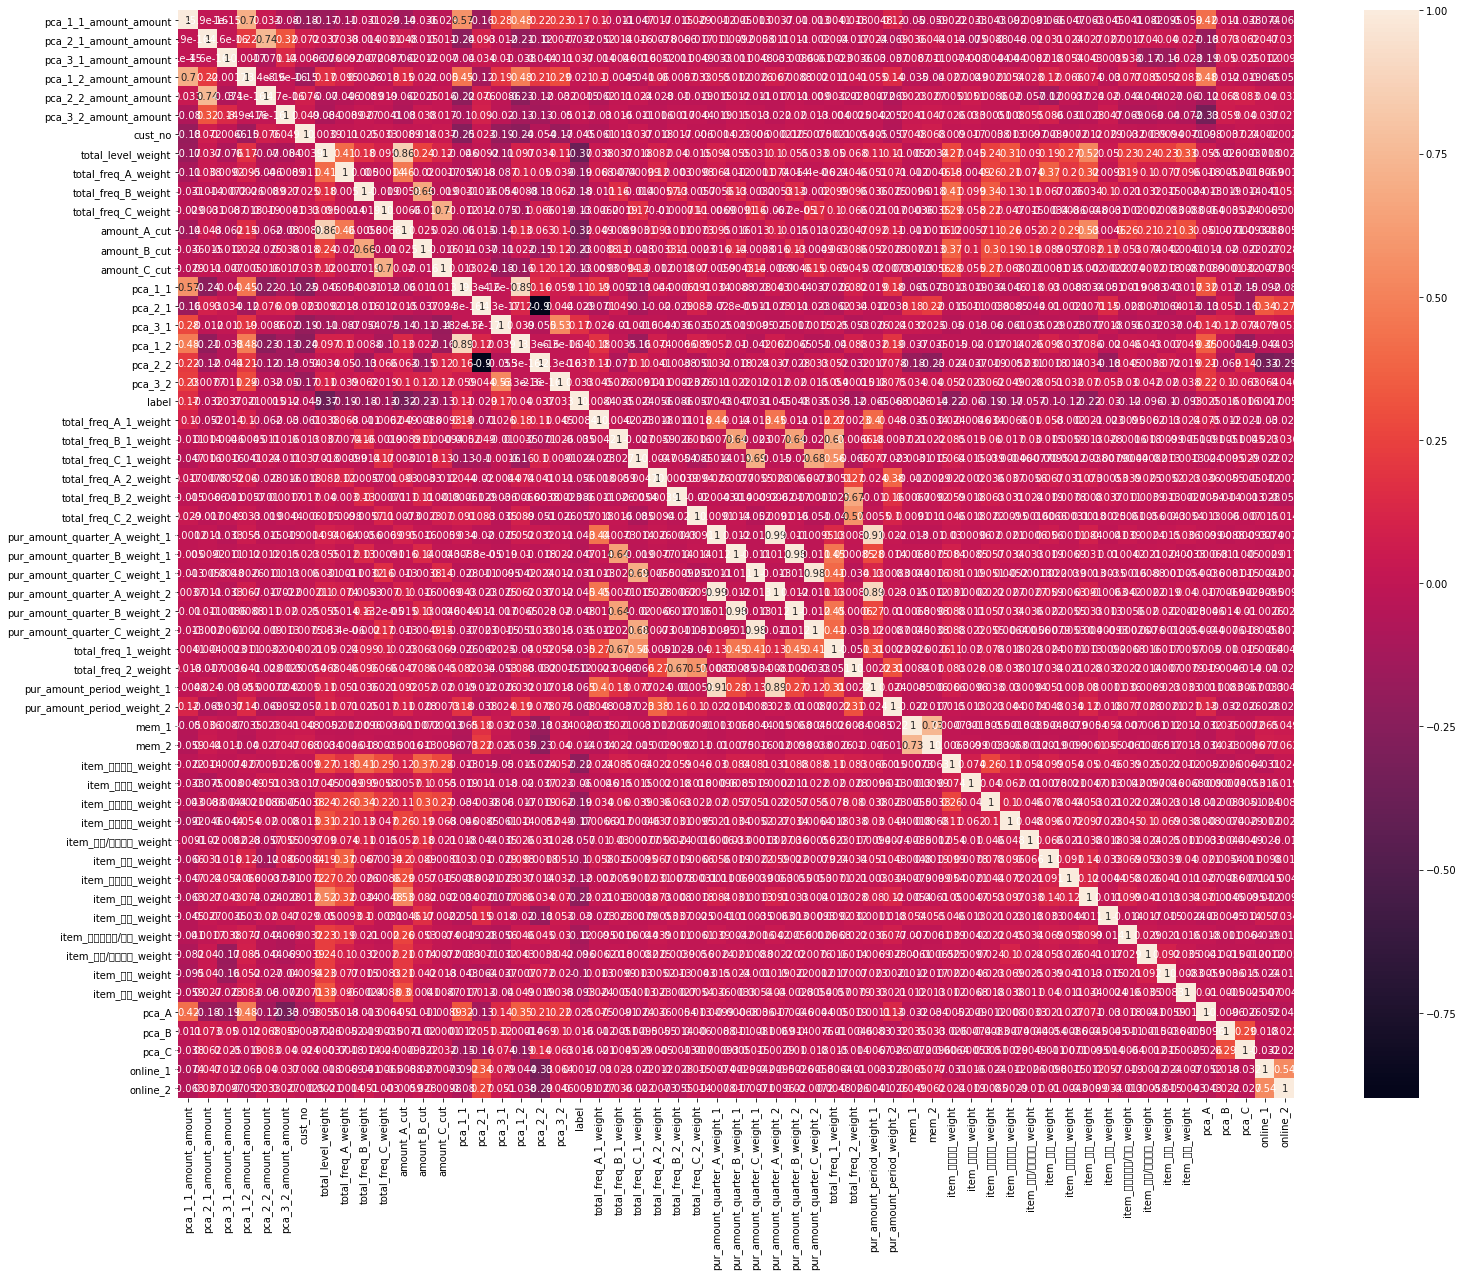

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(25,20))
sns.heatmap(asb.corr(),annot=True)

In [278]:
col = asb.columns[asb.columns.str.contains('[ABC]')]
col = list(asb.columns.drop(col))
col.extend(['total_freq_A_weight','total_freq_B_weight','total_freq_C_weight'])


In [272]:
asb1 = asb[col]
asb1

,cust_no,total_level_weight,pca_1_1,pca_2_1,pca_3_1,pca_1_2,pca_2_2,pca_3_2,label,total_freq_1_weight,total_freq_2_weight,pur_amount_period_weight_1,pur_amount_period_weight_2,item_가공식품_weight,item_의약품_weight,item_신선식품_weight,item_일상용품_weight,item_교육/문화용품_weight,item_외식_weight,item_패션잡화_weight,item_의류_weight,item_기타_weight,item_전문스포츠/레저_weight,item_가구/인테리어_weight,item_가전_weight,item_명품_weight,online_1,online_2,mem_1,mem_2,total_freq_A_weight,total_freq_B_weight,total_freq_C_weight
0,1,8.5,2.501510,-3.505358,2.510093,2.699335,2.869114,3.295428,1,-0.4,3.5,6.4,7.5,-7.5,0.6,5.2,8.5,0.0,7.0,-5.2,8.0,0.0,-4.0,7.5,4.5,0.0,0.0,0.0,NaN,NaN,1.647971,0.314864,0.920712
1,2,-6.4,5.479009,-1.159008,0.280189,4.824459,1.908645,0.165109,0,-2.1,-0.5,-8.0,-8.5,-6.5,0.0,-8.5,-9.0,0.0,-4.2,-5.2,7.0,0.0,-8.5,-5.5,-7.5,1.5,0.0,0.0,NaN,NaN,-2.184006,0.007569,-0.038065
2,3,0.2,-2.324284,-3.566178,-1.503844,-4.313222,2.154137,-1.154221,1,2.8,-3.5,0.4,-0.8,0.8,0.0,1.0,0.6,0.0,0.0,0.0,-0.6,0.0,0.0,0.0,0.8,0.0,0.0,0.0,NaN,NaN,-0.097707,-0.036331,1.495978
3,4,-3.0,0.516737,-1.915380,1.801946,-0.404022,1.142879,1.496629,1,2.5,0.2,4.0,-3.0,-3.2,-2.4,-4.0,4.5,0.0,-4.4,-4.0,-4.8,0.0,3.6,2.8,0.0,0.0,0.0,0.0,NaN,NaN,-1.758231,0.446562,-1.188597
4,5,-3.6,4.853939,-0.623359,-1.040776,2.465400,1.812457,-4.062787,1,0.8,-1.5,-4.8,-4.0,-6.5,0.0,-4.5,-5.5,0.0,-6.5,-1.8,-2.4,0.0,0.7,2.4,-1.5,-0.2,0.0,0.0,NaN,NaN,-1.971118,-0.124129,-0.038065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,19376,0.1,-1.442381,-0.664345,-6.482210,-1.147307,-1.970471,-4.115034,0,0.0,0.5,0.0,0.0,0.2,0.0,0.4,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,-0.055130,0.446562,-0.038065
19334,19377,0.1,-1.442381,-0.664345,-6.482210,0.049985,-0.465224,-3.429639,0,0.0,0.2,0.0,0.0,0.1,0.0,0.0,0.9,0.0,0.2,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2.0,0.030025,-0.036331,-0.038065
19335,19378,0.2,-1.442381,-0.664345,-6.482210,1.313979,0.207517,-2.202948,0,0.0,0.2,0.0,0.0,0.1,0.0,0.4,0.9,0.0,0.2,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.200335,-0.036331,-0.038065
19336,19379,0.3,-1.442381,-0.664345,-6.482210,0.234478,0.866206,-4.743563,0,0.0,1.0,0.0,0.0,0.2,0.6,0.0,2.5,0.0,0.6,2.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.115180,-0.080230,-0.038065


In [48]:
pd.set_option('max_columns',None)
ax = asb.corr()
ax[((ax>0.7) & (ax!=1))]

,pca_1_1_amount_amount,pca_2_1_amount_amount,pca_3_1_amount_amount,pca_1_2_amount_amount,pca_2_2_amount_amount,pca_3_2_amount_amount,cust_no,total_level_weight,total_freq_A_weight,total_freq_B_weight,total_freq_C_weight,amount_A_cut,amount_B_cut,amount_C_cut,pca_1_1,pca_2_1,pca_3_1,pca_1_2,pca_2_2,pca_3_2,label,total_freq_A_1_weight,total_freq_B_1_weight,total_freq_C_1_weight,total_freq_A_2_weight,total_freq_B_2_weight,total_freq_C_2_weight,pur_amount_quarter_A_weight_1,pur_amount_quarter_B_weight_1,pur_amount_quarter_C_weight_1,pur_amount_quarter_A_weight_2,pur_amount_quarter_B_weight_2,pur_amount_quarter_C_weight_2,total_freq_1_weight,total_freq_2_weight,pur_amount_period_weight_1,pur_amount_period_weight_2,mem_1,mem_2,item_가공식품_weight,item_의약품_weight,item_신선식품_weight,item_일상용품_weight,item_교육/문화용품_weight,item_외식_weight,item_패션잡화_weight,item_의류_weight,item_기타_weight,item_전문스포츠/레저_weight,item_가구/인테리어_weight,item_가전_weight,item_명품_weight
pca_1_1_amount_amount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pca_2_1_amount_amount,NaN,NaN,NaN,NaN,0.742604,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pca_3_1_amount_amount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pca_1_2_amount_amount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pca_2_2_amount_amount,NaN,0.742604,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pca_3_2_amount_amount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cust_no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_level_weight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.860577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_freq_A_weight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_freq_B_weight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
ax['label'].sort_values()

total_level_weight              -0.372418
amount_A_cut                    -0.320216
amount_B_cut                    -0.226811
item_가공식품_weight                -0.220215
item_의류_weight                  -0.216146
total_freq_A_weight             -0.194648
item_신선식품_weight                -0.189620
total_freq_B_weight             -0.178720
item_일상용품_weight                -0.170632
total_freq_C_weight             -0.128471
amount_C_cut                    -0.127690
item_패션잡화_weight                -0.123312
total_freq_2_weight             -0.122203
item_전문스포츠/레저_weight            -0.117927
item_외식_weight                  -0.101714
item_가전_weight                  -0.100580
item_가구/인테리어_weight             -0.095595
item_명품_weight                  -0.093279
total_freq_B_2_weight           -0.085599
pur_amount_period_weight_2      -0.068188
pur_amount_period_weight_1      -0.065458
item_의약품_weight                 -0.060011
total_freq_C_2_weight           -0.057419
item_교육/문화용품_weight             -0

In [68]:
online_1 = pr1.loc[pr1['cat_so'].str.contains('온라인')]
online_1

,channel,receipt_no,code_dae,code_jung,code_so,cust_no,branch_no,pur_date,pur_hour,pur_amount,cat_dae,cat_jung,cat_so,year,month,yoil,half,week,pur_time,period,pur_week_time
25905451,B,9561384,62,6201,B620107,16949,75,2014-03-03,17,2500,가공식품,빵,온라인베이커리,2014,3,월,1,주중,오후,2014_1,주중_오후
25905452,B,6443980,62,6201,B620107,16812,7,2014-05-02,14,2000,가공식품,빵,온라인베이커리,2014,5,금,1,주중,오후,2014_1,주중_오후
25905453,B,9427553,62,6201,B620107,12275,71,2014-04-08,22,1900,가공식품,빵,온라인베이커리,2014,4,화,1,주중,밤,2014_1,주중_밤
25905454,B,8960635,62,6201,B620107,12304,52,2014-03-16,13,2500,가공식품,빵,온라인베이커리,2014,3,일,1,주말,오후,2014_1,주말_오후
25905456,B,8670214,62,6201,B620107,12398,44,2014-04-03,19,5400,가공식품,빵,온라인베이커리,2014,4,목,1,주중,밤,2014_1,주중_밤
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28592963,B,11096551,52,5201,B520110,14570,135,2014-06-29,23,8900,신선식품,과실과일,온라인 국산과일,2014,6,일,1,주말,밤,2014_1,주말_밤
28592999,B,67840,44,4408,B440802,13116,3,2014-01-25,11,59000,패션잡화,NB구두,온라인 NB구두,2014,1,토,1,주말,오전,2014_1,주말_오전
28593000,B,3992,44,4408,B440802,3900,1,2014-02-22,20,29000,패션잡화,NB구두,온라인 NB구두,2014,2,토,1,주말,밤,2014_1,주말_밤
28593017,B,70929,45,4518,B451803,3229,3,2014-05-10,18,35000,패션잡화,썬글라스,온라인 썬글라스,2014,5,토,1,주말,오후,2014_1,주말_오후


In [164]:
ab = pr1[pr1['cat_so'].str.contains('온라인')].pivot_table(index='cust_no',values='cat_dae',aggfunc='count').reset_index()
ab.columns=['cust_no','online_1']

ab1 = pr2[pr2['cat_so'].str.contains('온라인')].pivot_table(index='cust_no',values='cat_dae',aggfunc='count').reset_index()
ab1.columns=['cust_no','online_2']

In [165]:
abc = pd.merge(ab,ab1,on='cust_no',how='outer')


In [166]:
asb = pd.merge(asb,abc,on='cust_no',how='left').fillna(0)

In [99]:
asb = asb.drop(['online_1','online_2'],axis=1)

In [73]:
pca_cha = pd.read_csv('지역_시간/dataframe/pca_channel.csv',index_col=0)
pca_cha

,pca_A,pca_B,pca_C
0,1.148306e+07,-719980.817963,-364611.502961
1,4.387892e+06,-763401.488906,-463185.698405
2,-3.559285e+06,-762740.988125,445884.044483
3,-1.413001e+06,-697103.040917,-399711.367023
4,-3.133871e+06,-763529.040321,-463185.698405
...,...,...,...
19333,-3.589678e+06,-700498.273090,-463185.698405
19334,-3.575046e+06,-761076.035342,-463185.698405
19335,-3.445181e+06,-763457.526020,-463185.698405
19336,-3.551957e+06,-763575.325365,-463185.698405


In [74]:
asb = pd.concat([asb,pca_cha],axis=1)
asb

,pca_1_1_amount_amount,pca_2_1_amount_amount,pca_3_1_amount_amount,pca_1_2_amount_amount,pca_2_2_amount_amount,pca_3_2_amount_amount,cust_no,total_level_weight,total_freq_A_weight,total_freq_B_weight,total_freq_C_weight,amount_A_cut,amount_B_cut,amount_C_cut,pca_1_1,pca_2_1,pca_3_1,pca_1_2,pca_2_2,pca_3_2,label,total_freq_A_1_weight,total_freq_B_1_weight,total_freq_C_1_weight,total_freq_A_2_weight,total_freq_B_2_weight,total_freq_C_2_weight,pur_amount_quarter_A_weight_1,pur_amount_quarter_B_weight_1,pur_amount_quarter_C_weight_1,pur_amount_quarter_A_weight_2,pur_amount_quarter_B_weight_2,pur_amount_quarter_C_weight_2,total_freq_1_weight,total_freq_2_weight,pur_amount_period_weight_1,pur_amount_period_weight_2,mem_1,mem_2,item_가공식품_weight,item_의약품_weight,item_신선식품_weight,item_일상용품_weight,item_교육/문화용품_weight,item_외식_weight,item_패션잡화_weight,item_의류_weight,item_기타_weight,item_전문스포츠/레저_weight,item_가구/인테리어_weight,item_가전_weight,item_명품_weight,pca_A,pca_B,pca_C
0,0.784637,-0.213796,-0.598405,2.832500,-1.067632,-0.695149,1,8.5,1.647971,0.314864,0.920712,1.514700,0.852540,1.367811,2.501510,-3.505358,2.510093,2.699335,2.869114,3.295428,1,-4.0,-0.1,0.4,4.0,1.2,2.0,6.0,-0.2,2.0,6.8,-0.5,3.6,-0.4,3.5,6.4,7.5,0,0,-7.5,0.6,5.2,8.5,0.0,7.0,-5.2,8.0,0.0,-4.0,7.5,4.5,0.0,1.148306e+07,-719980.817963,-364611.502961
1,1.803583,0.603966,0.055219,1.639555,0.564882,0.122170,2,-6.4,-2.184006,0.007569,-0.038065,-1.361034,0.206128,-0.051048,5.479009,-1.159008,0.280189,4.824459,1.908645,0.165109,0,-5.0,-0.1,0.0,-4.0,0.2,0.0,-7.5,-0.2,0.0,-7.5,-0.2,0.0,-2.1,-0.5,-8.0,-8.5,0,0,-6.5,0.0,-8.5,-9.0,0.0,-4.2,-5.2,7.0,0.0,-8.5,-5.5,-7.5,1.5,4.387892e+06,-763401.488906,-463185.698405
2,-0.802985,0.063796,-0.028565,-0.779433,0.160906,-0.133339,3,0.2,-0.097707,-0.036331,1.495978,-0.402456,0.206128,1.367811,-2.324284,-3.566178,-1.503844,-4.313222,2.154137,-1.154221,1,0.1,0.0,4.0,0.0,-0.1,-4.0,0.3,0.0,4.4,0.0,0.0,4.4,2.8,-3.5,0.4,-0.8,0,0,0.8,0.0,1.0,0.6,0.0,0.0,0.0,-0.6,0.0,0.0,0.0,0.8,0.0,-3.559285e+06,-762740.988125,445884.044483
3,-0.105395,-0.065355,-0.184207,-0.223663,0.007239,-0.039796,4,-3.0,-1.758231,0.446562,-1.188597,-1.041508,0.852540,-1.469908,0.516737,-1.915380,1.801946,-0.404022,1.142879,1.496629,1,4.5,0.6,2.0,-2.4,0.0,1.2,4.4,0.6,4.5,4.0,1.6,4.5,2.5,0.2,4.0,-3.0,0,0,-3.2,-2.4,-4.0,4.5,0.0,-4.4,-4.0,-4.8,0.0,3.6,2.8,0.0,0.0,-1.413001e+06,-697103.040917,-399711.367023
4,0.159417,-0.197516,-0.020612,-0.419092,-0.149246,0.125819,5,-3.6,-1.971118,-0.124129,-0.038065,-1.361034,-0.440284,-0.051048,4.853939,-0.623359,-1.040776,2.465400,1.812457,-4.062787,1,3.0,-0.1,0.0,-4.0,0.0,0.0,-3.3,-0.1,0.0,-2.7,-0.0,0.0,0.8,-1.5,-4.8,-4.0,0,0,-6.5,0.0,-4.5,-5.5,0.0,-6.5,-1.8,-2.4,0.0,0.7,2.4,-1.5,-0.2,-3.133871e+06,-763529.040321,-463185.698405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,-0.811544,0.060712,-0.032733,-0.802842,0.139387,-0.141343,19376,0.1,-0.055130,0.446562,-0.038065,-0.082930,0.852540,-0.051048,-1.442381,-0.664345,-6.482210,-1.147307,-1.970471,-4.115034,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0,0,0.2,0.0,0.4,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.589678e+06,-700498.273090,-463185.698405
19334,-0.811544,0.060712,-0.032733,-0.761870,0.149047,-0.119386,19377,0.1,0.030025,-0.036331,-0.038065,0.236596,0.206128,-0.051048,-1.442381,-0.664345,-6.482210,0.049985,-0.465224,-3.429639,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0,1,0.1,0.0,0.0,0.9,0.0,0.2,0.0,0.1,0.0,0.0,0.0,0.0,0.0,-3.575046e+06,-761076.035342,-463185.698405
19335,-0.811544,0.060712,-0.032733,-0.753904,0.161616,-0.124824,19378,0.2,0.200335,-0.036331,-0.038065,0.556122,0.206128,-0.051048,-1.442381,-0.664345,-6.482210,1.313979,0.207517,-2.202948,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0,0,0.1,0.0,0.4,0.9,0.0,0.2,0.0,0.6,0.0,0.0,0.0,0.0,0.0